In [1]:
import pandas as pd
import numpy as np
import os
import gzip, pickle
import re
import cycler

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [2]:
##Carrega informações do fundos
filename='itau_phoenix.pkl'

with gzip.open(filename,'rb') as fp:
    my_shelf = pickle.load(fp)

for k in my_shelf.keys():
    globals()[k] = my_shelf[k]
carteira = carteira.query("FILE != 'PL'")

# Constroi a matriz de pesos da carteira
linhas são datas, colunas são ativos

In [3]:
#coluna de id
pivot_cols = carteira.CD_ATIVO\
            .fillna(carteira.CD_ISIN)\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8') & carteira.TP_ATIVO.str.contains("Ação|Ações|Opção|Opcões|Outr|Recibo|BDR", flags=re.IGNORECASE)].DS_ATIVO.str.extract(r'([A-Z]{0,5}\d+)', expand=False))\
            .fillna(carteira[carteira.FILE.str.contains('BLC_8')].DS_ATIVO.str.extract(r'(BR[A-Z0-9]+)', expand=False))\
            .fillna(carteira[carteira.DS_ATIVO.str.lower().isin(['disponibilidades', 'valores a pagar', 'valores a receber'])].DS_ATIVO.str.upper()) \
            .fillna(carteira[carteira.TP_ATIVO == 'Título público federal'].DS_ATIVO.str.extract(r'(\d{6})', expand=False))
pesos = carteira.pivot_table(index='DT_COMPTC', columns=pivot_cols, values='peso', aggfunc='sum')

# Calcula os retornos dos ativos e dos títulos

In [4]:
retornos_acoes = acoes_qry.query("TPMERC == 10").pivot_table(index='DATA', columns='CODNEG', values='PREULT').div(100).pct_change()
retornos_titulos = titulos_qry.pivot_table(index='DT_MOV', columns='CODISI', values='VALOR_PAR').pct_change()
retornos_opcoes = acoes_qry.query("TPMERC != 10").pivot_table(index='DATA', columns='CODNEG', values='PREULT').div(100).pct_change()

In [5]:
print('Açoes')
retornos_acoes.describe().round(4)

Açoes


CODNEG,AALR3,ABEV1,ABEV3,ABEV9,ABNB3,ABRE11,AEDU11,AEDU3,ALSC3,AMAR3,...,TOTS3,TRPL4,TUPY3,USIM5,VALE3,VALE5,VIVT4,VLID3,VVAR11,WEGE3
count,288.0000,908.0000,1020.0000,886.0000,2187.0000,1591.0000,2187.0000,1749.0000,1960.0000,1859.0000,...,2187.0000,2187.0000,2186.0000,2187.0000,2187.0000,2187.0000,1540.0000,1766.0000,997.0000,2187.0000
mean,-0.0007,0.0017,0.0003,-0.0000,0.0003,0.0005,0.0006,0.0000,0.0005,-0.0003,...,0.0004,0.0003,0.0004,0.0002,0.0005,0.0004,0.0001,0.0002,0.0006,0.0006
std,0.0191,0.0522,0.0134,0.0019,0.0070,0.0133,0.0123,0.0240,0.0186,0.0247,...,0.0265,0.0175,0.0229,0.0370,0.0264,0.0247,0.0156,0.0196,0.0340,0.0214
min,-0.0804,-0.3333,-0.0551,-0.0201,-0.0558,-0.0938,-0.0763,-0.6653,-0.1559,-0.1635,...,-0.7968,-0.2406,-0.4747,-0.4867,-0.1451,-0.1205,-0.0692,-0.1048,-0.1291,-0.4921
25%,-0.0099,0.0000,-0.0072,0.0000,0.0000,0.0000,0.0000,0.0000,-0.0096,-0.0139,...,-0.0116,-0.0093,-0.0096,-0.0190,-0.0145,-0.0137,-0.0091,-0.0106,-0.0182,-0.0094
50%,-0.0009,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,-0.0015,0.0000,0.0000,0.0002,0.0000,-0.0008,0.0000
75%,0.0068,0.0000,0.0084,0.0000,0.0000,0.0000,0.0000,0.0000,0.0105,0.0125,...,0.0125,0.0102,0.0099,0.0174,0.0137,0.0129,0.0098,0.0098,0.0177,0.0109
max,0.1027,1.2500,0.0582,0.0246,0.0653,0.1164,0.1053,0.1136,0.1600,0.1411,...,0.0863,0.1023,0.1252,0.3511,0.1476,0.1135,0.0907,0.1171,0.1649,0.0834


In [6]:
print("Títulos Públicos")
retornos_titulos.describe()

Títulos Públicos


CODISI,000000000000,BRSTNCLF1Q59,BRSTNCLF1QB8,BRSTNCLF1QC6,BRSTNCLF1QD4,BRSTNCLF1QE2,BRSTNCLF1QF9,BRSTNCLF1QG7,BRSTNCLF1QH5,BRSTNCLF1QI3,...,BRSTNCNTF0H7,BRSTNCNTF0I5,BRSTNCNTF0J3,BRSTNCNTF0N5,BRSTNCNTF0O3,BRSTNCNTF139,BRSTNCNTF147,BRSTNCNTF162,BRSTNCNTF170,BRSTNCNTF1P8
count,2126.0,2467.000000,2467.000000,2467.000000,3284.000000,3153.000000,2467.000000,3121.000000,3109.000000,3086.000000,...,2467.0,2467.0,2466.0,2230.0,2085.0,1748.0,1705.0,1499.0,1242.0,736.0
mean,0.0,0.000002,0.000021,0.000029,0.000152,0.000163,0.000012,0.000168,0.000177,0.000183,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.000033,0.000087,0.000100,0.000278,0.000242,0.000070,0.000405,0.000508,0.000374,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.000000,0.000000,0.000000,0.000384,0.000402,0.000000,0.000384,0.000329,0.000384,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.000473,0.000473,0.000473,0.006079,0.002105,0.000473,0.012166,0.010751,0.005905,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Análise PCA dos retornos dos ativos

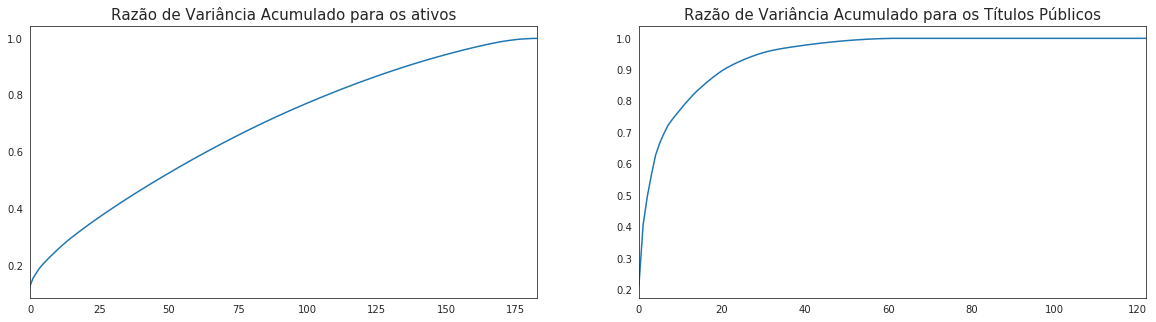

In [7]:
fig, (axe, axd) = plt.subplots(ncols=2, figsize=(20,5))
std_stock_returns = StandardScaler().fit_transform(retornos_acoes.fillna(0))
pd.Series(PCA().fit(std_stock_returns).explained_variance_ratio_).cumsum().plot(ax=axe)
axe.set_title('Razão de Variância Acumulado para os ativos', fontsize=15)

std_securities_returns = StandardScaler().fit_transform(retornos_titulos.fillna(0))
pd.Series(PCA().fit(std_securities_returns).explained_variance_ratio_).cumsum().plot(ax=axd)
axd.set_title('Razão de Variância Acumulado para os Títulos Públicos', fontsize=15);

### Cria uma proxy para o índice futuro

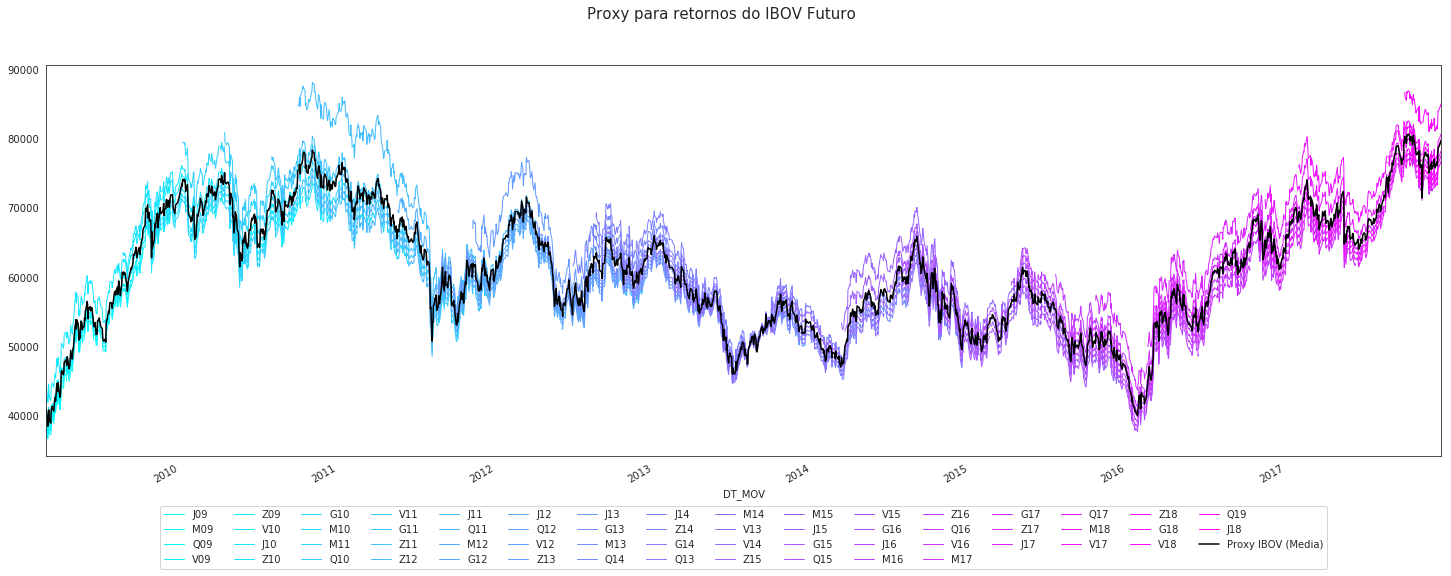

In [8]:
q = futuros_qry.MERCADORIA.str.contains('IND')
grp = futuros_qry.loc[q].groupby(['DT_MOV','ANO_VENCIMENTO','MES_VENCIMENTO'])['PRECO_ATUAL']
df = grp.mean().unstack([2,1])
df.columns = [i+j for i, j in df.columns]
df.plot(figsize=(25,8), cmap='cool', lw=1)
IBOV_FUT = grp.mean().groupby(level='DT_MOV').mean().rename('IBOV_FUT')
IBOV_FUT.plot(color='k', label='Proxy IBOV (Media)', ls='-')
plt.legend(ncol=16, loc=8, bbox_to_anchor=(0.5,-0.3))
plt.suptitle("Proxy para retornos do IBOV Futuro",fontsize=15);

### Ajustes manuais da matriz de pesos
ativos que estão na carteira mas não possuem séries de preços

In [9]:
retornos_acoes_empresa = retornos_acoes.groupby(lambda s: s[0:4], axis=1)

In [10]:
retornos_acoes_empresa = retornos_acoes.groupby(lambda s: s[0:4], axis=1).mean()
retornos_acoes_empresa['PCAR'] = retornos_acoes['PCAR4'].replace(0,pd.np.nan).fillna(retornos_acoes['PCAR5']).values
retornos_acoes_empresa['CMIG'] = retornos_acoes[['CMIG3','CMIG4']].mean(axis=1).values
retornos_acoes_empresa['SEER'] = retornos_acoes['SEER3'].values
retornos_acoes_empresa['BTOW'] = retornos_acoes['BTOW3'].values
retornos_acoes_empresa['MULT'] = retornos_acoes['MULT3'].values
retornos_acoes_empresa['ITSA'] = retornos_acoes['ITSA4'].values
retornos_acoes_empresa['BBDC'] = retornos_acoes['BBDC4'].values
retornos_acoes_empresa['ABEV'] = retornos_acoes['ABEV3'].values
retornos_acoes_empresa['HRTP'] = retornos_acoes['HRTP3'].values
retornos_acoes_empresa['KLBN'] = retornos_acoes['KLBN4'].values
retornos_acoes_empresa['LPSB'] = retornos_acoes['LPSB3'].values
retornos_acoes_empresa['SAPR'] = retornos_acoes['SAPR4'].values
retornos_acoes_empresa['MPXE'] = retornos_acoes['MPXE3'].values
retornos_acoes_empresa['GFSA'] = retornos_acoes['GFSA3'].values
retornos_acoes_empresa['GFSA'] = retornos_acoes['GFSA3'].values
retornos_acoes_empresa['LAME'] = retornos_acoes['LAME3'].values
retornos_acoes_empresa['HYPE'] = retornos_acoes['HYPE3'].values
retornos_acoes_empresa['KROT'] = retornos_acoes['KROT11'].replace(0,pd.np.nan).fillna(retornos_acoes['KROT3'].rolling(3).median()).values
retornos_acoes_empresa['SUZB'] = retornos_acoes['SUZB5'].replace(0,pd.np.nan).fillna(retornos_acoes['SUZB3']).values
retornos_acoes_empresa['VALE'] = retornos_acoes[['VALE3','VALE5']].mean(axis=1).values
retornos_acoes_empresa['GETI'] = retornos_acoes[['GETI3','GETI4']].mean(axis=1).values
retornos_acoes_empresa['PETR'] = retornos_acoes[['PETR3','PETR4']].mean(axis=1).values
retornos_acoes_empresa['AEDU'] = retornos_acoes['AEDU11'].replace(0,pd.np.nan).fillna(retornos_acoes['AEDU3']).values
retornos_acoes_empresa['RAPT'] = retornos_acoes['RAPT4'].values

In [11]:
retornos = pd.concat([retornos_acoes_empresa, retornos_titulos,retornos_opcoes, IBOV_FUT.pct_change().to_frame()], sort=False, axis=1).drop_duplicates()

In [12]:
#adiciona os pesos agregados dos contratos futuros na matriz de pesos
q = pivot_cols.isnull() & carteira.DS_ATIVO.str.contains('IND')
pesos['IBOV_FUT'] = carteira.loc[q].groupby('DT_COMPTC')['peso'].sum().reindex(index=pesos.index)

In [13]:
#ajusta os títulos que foram listados apenas com a selic no bloco_8 do relatório à CVM
cod_selic_codigo_ISI_map = dict(titulos_qry[['CODIGO', 'CODISI']].drop_duplicates().applymap(str).values)
pesos.rename(columns=cod_selic_codigo_ISI_map, inplace=True)

In [14]:
ticker_empresa_map = {v:k for k,vv in retornos_acoes.groupby(lambda s: s[0:4], axis=1).groups.items() for v in vv}
ticker_empresa_map.update({'TEND9':'TEND'})
pesos.rename(columns=ticker_empresa_map, inplace=True)

In [15]:
#ativos não identificados
identified = list(retornos.columns.str.lower()) + ['disponibilidades','valores a pagar','valores a receber']
(~pesos.columns.str.lower().isin(identified)).sum()

0

In [16]:
pesos = pesos.groupby(level=0, axis=1).sum()

### Agrupamento

In [17]:
import colorlover as cl

In [18]:
classes = pd.read_excel("classificao_acoes.xlsx", encoding='latin1')
classes.columns = ['SETOR','SUBSETOR','SEGMENTO','EMPRESA','CODIGO','SEGMENTO.1']
classes_acoes = dict(classes[['CODIGO','SETOR']].values)

In [19]:
mapper = dict(zip(retornos_acoes.columns, retornos_acoes.columns.str.slice(0,4).map(classes_acoes.get)))

In [80]:
pesos_acoes = pesos.groupby(classes_acoes.get, axis=1).sum()
pesos_titulos = pd.Series(pesos.reindex(columns=retornos_titulos.columns).sum(axis=1), name='Títulos Públicos')
pesos_opcoes = pd.Series(pesos.reindex(columns=retornos_opcoes.columns).sum(axis=1), name='Opções')
outros_pesos = pesos[['VALORES A PAGAR', 'VALORES A RECEBER','DISPONIBILIDADES','IBOV_FUT']]

In [21]:
pesos_agregados = pd.concat([pesos_acoes,pesos_titulos,pesos_opcoes,outros_pesos], axis=1)

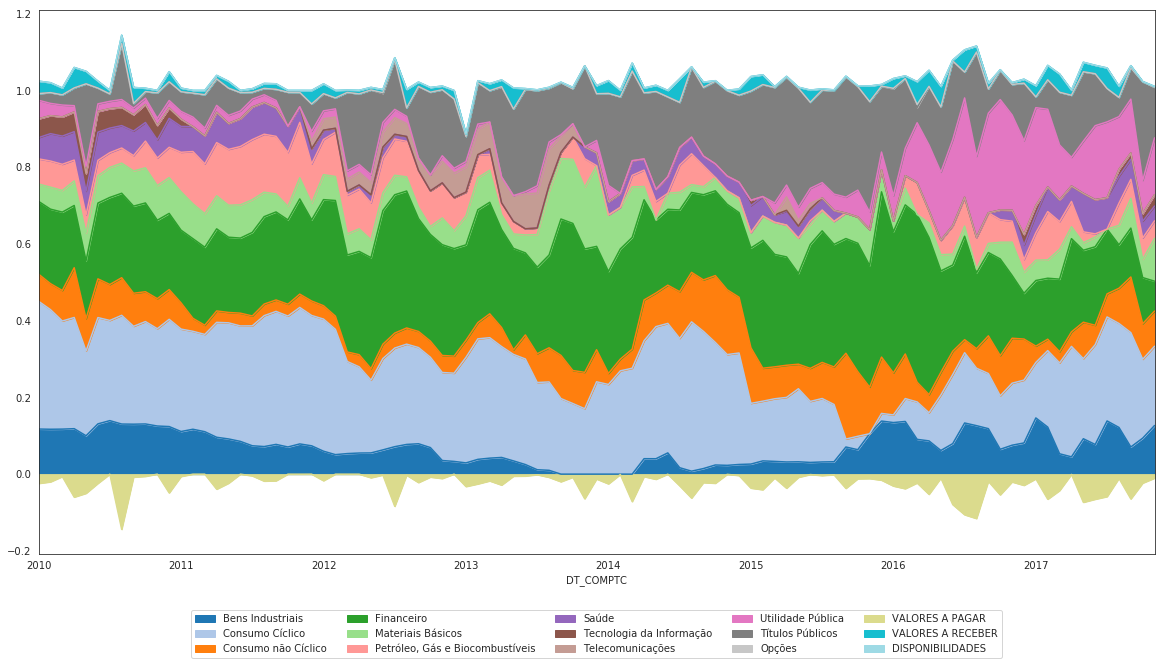

In [22]:
ax = pesos_agregados.drop('IBOV_FUT',axis=1).plot.area(figsize=(20,10), cmap='tab20')
ax.legend(ncol=5, loc=8, bbox_to_anchor=(0.5,-0.2))

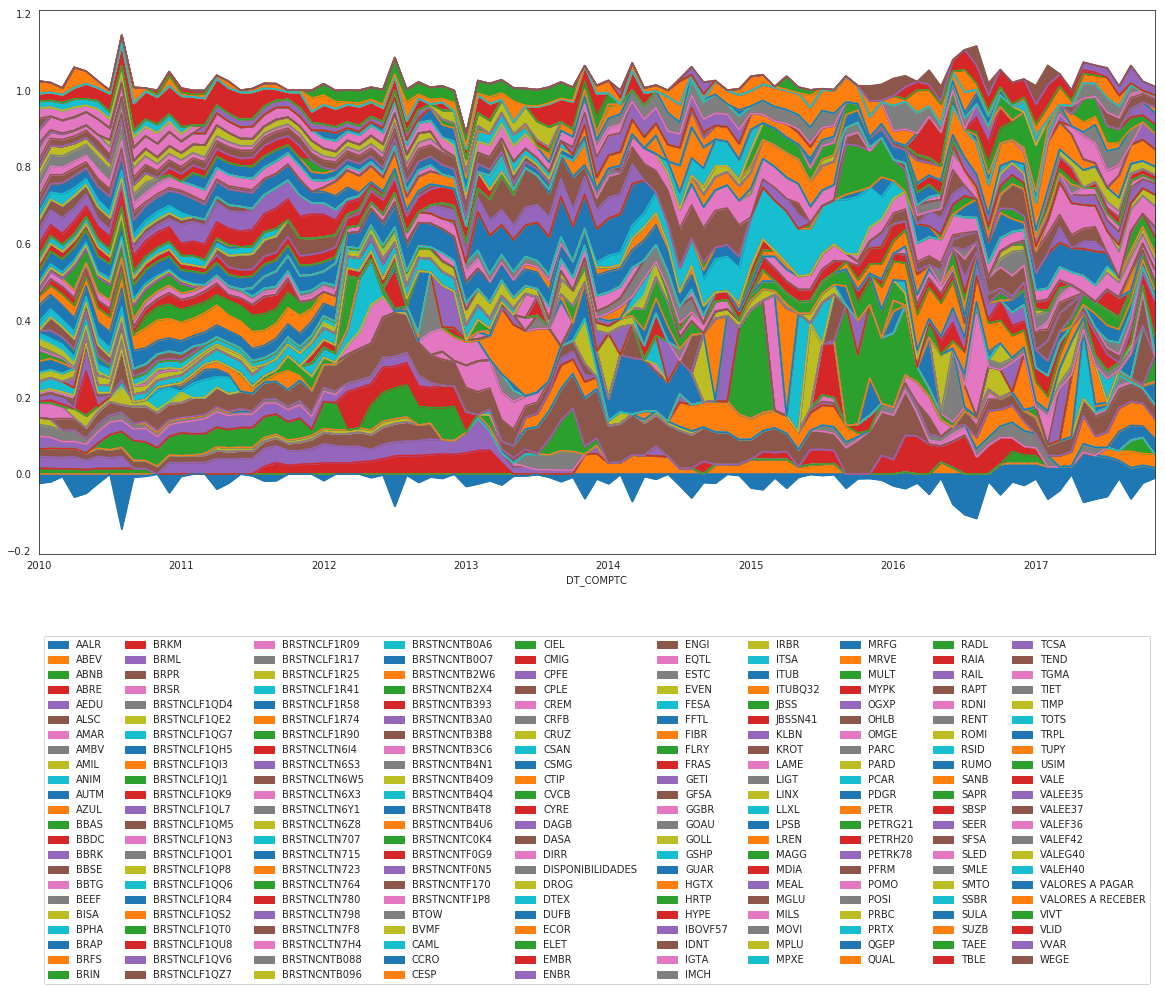

In [23]:
ax = pesos.drop('IBOV_FUT',axis=1).plot.area(figsize=(20,10))
ax.legend(ncol=10, loc=8, bbox_to_anchor=(0.5,-0.8))

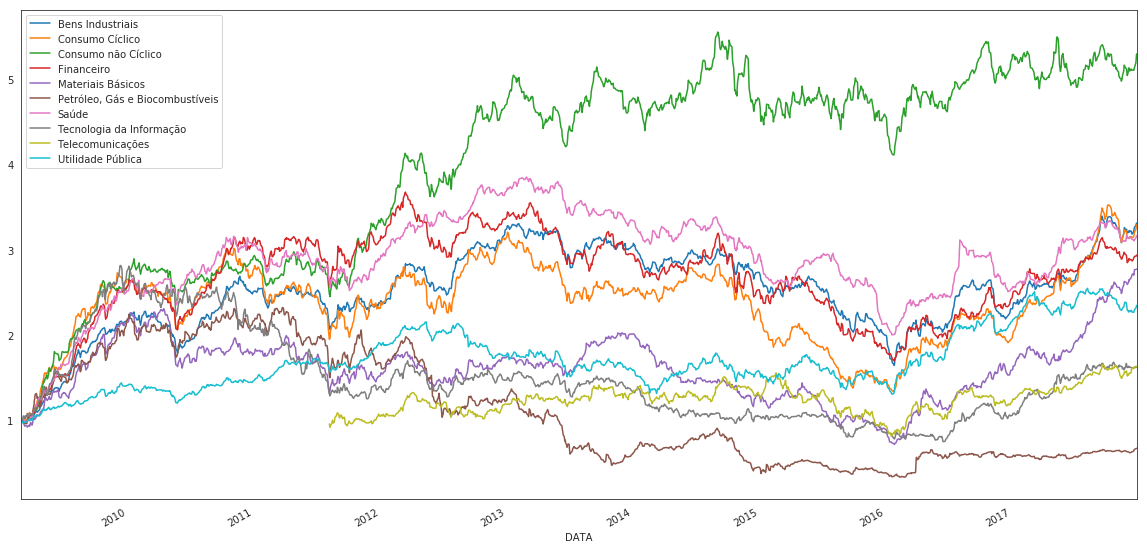

In [24]:
grp = retornos_acoes_empresa.groupby(classes_acoes.get, axis=1)
grp.mean().rolling(3).median().add(1).cumprod().plot(figsize=(20,10))

### Verifica se os dados contemplam todos ativos da carteira e se os pesos somam 1


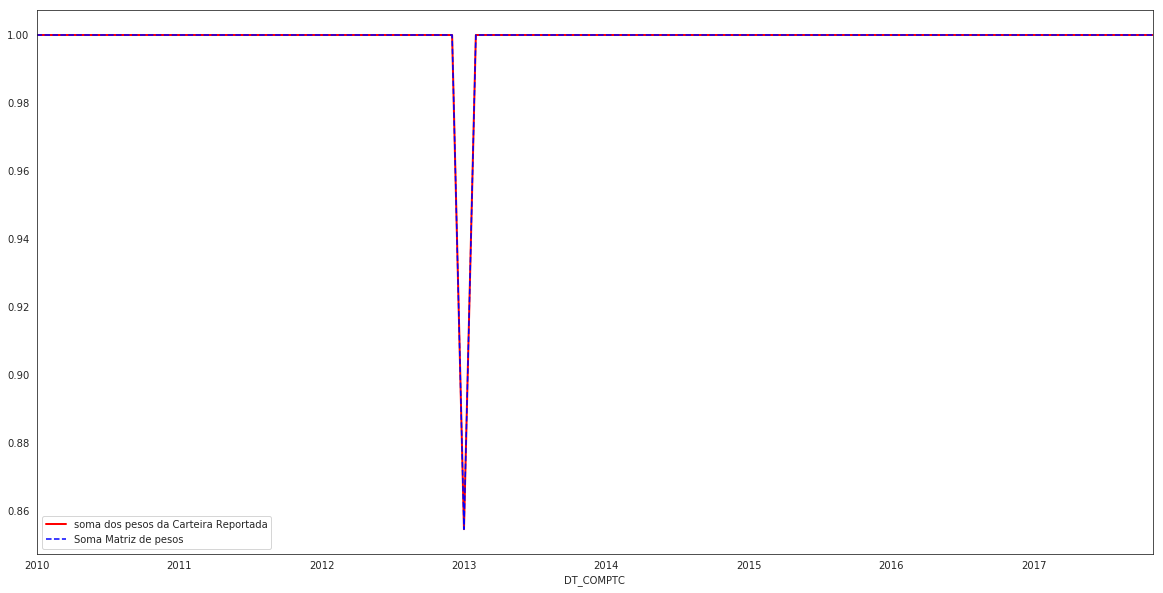

In [25]:
#os ativos somam 1 todos os meses?
q = carteira.groupby('DT_COMPTC').peso.sum()
ax = q.plot(figsize=(20,10), label='soma dos pesos da Carteira Reportada', color='red', lw=2)
pesos.sum(axis=1).plot(ax=ax, color='blue', ls='--', label='Soma Matriz de pesos')
#porque em 31/01/2013 o peso soma só 0.85? Faltam 7MM de patrimônio líquido. operações compromissadas?
ax.legend()

# Filtro de Kalman
2 passos

In [26]:
retornos = pd.concat([retornos_acoes_empresa, retornos_titulos,retornos_opcoes, IBOV_FUT.pct_change().to_frame()], sort=False, axis=1).drop_duplicates()

In [95]:
retornos_agregados = pd.concat([
        retornos_acoes_empresa.groupby(classes_acoes.get, axis=1).mean(),
        pd.Series(retornos_titulos.mean(axis=1), name='Títulos Públicos'),
        pd.Series(0, index=retornos_titulos.index, name='Caixa')
    ], axis=1)

pesos_agregados = pd.concat([
    pesos_acoes,
    pesos_titulos,
    pd.Series(outros_pesos[['VALORES A PAGAR', 'VALORES A RECEBER']].sum(1), name='Caixa')
], axis=1)

In [96]:
#Tratamento de outliers
q = retornos_agregados < retornos_agregados.std()*3
retornos_agregados = retornos_agregados[q].fillna(retornos_agregados.rolling(3, center=True).median())

In [97]:
#variacão da cota 
measurements = ((cotas - cotas.shift())/cotas).dropna()
measurements = measurements.reindex(index=measurements.index.intersection(pd.date_range(pesos.index.min(), pesos.index.max())))

#estados
eom_pesos = pesos_agregados.resample('D').bfill().reindex(index=measurements.index).reindex(index=measurements.groupby(pd.Grouper(freq='M')).tail(1).index)
states = eom_pesos.reindex(columns=retornos_agregados.columns, index=measurements.index)

signals = retornos_agregados.reindex(index=measurements.index.values).fillna(method='pad')

ValueError: When stacked is True, each column must be either all positive or negative.Caixa contains both positive and negative values

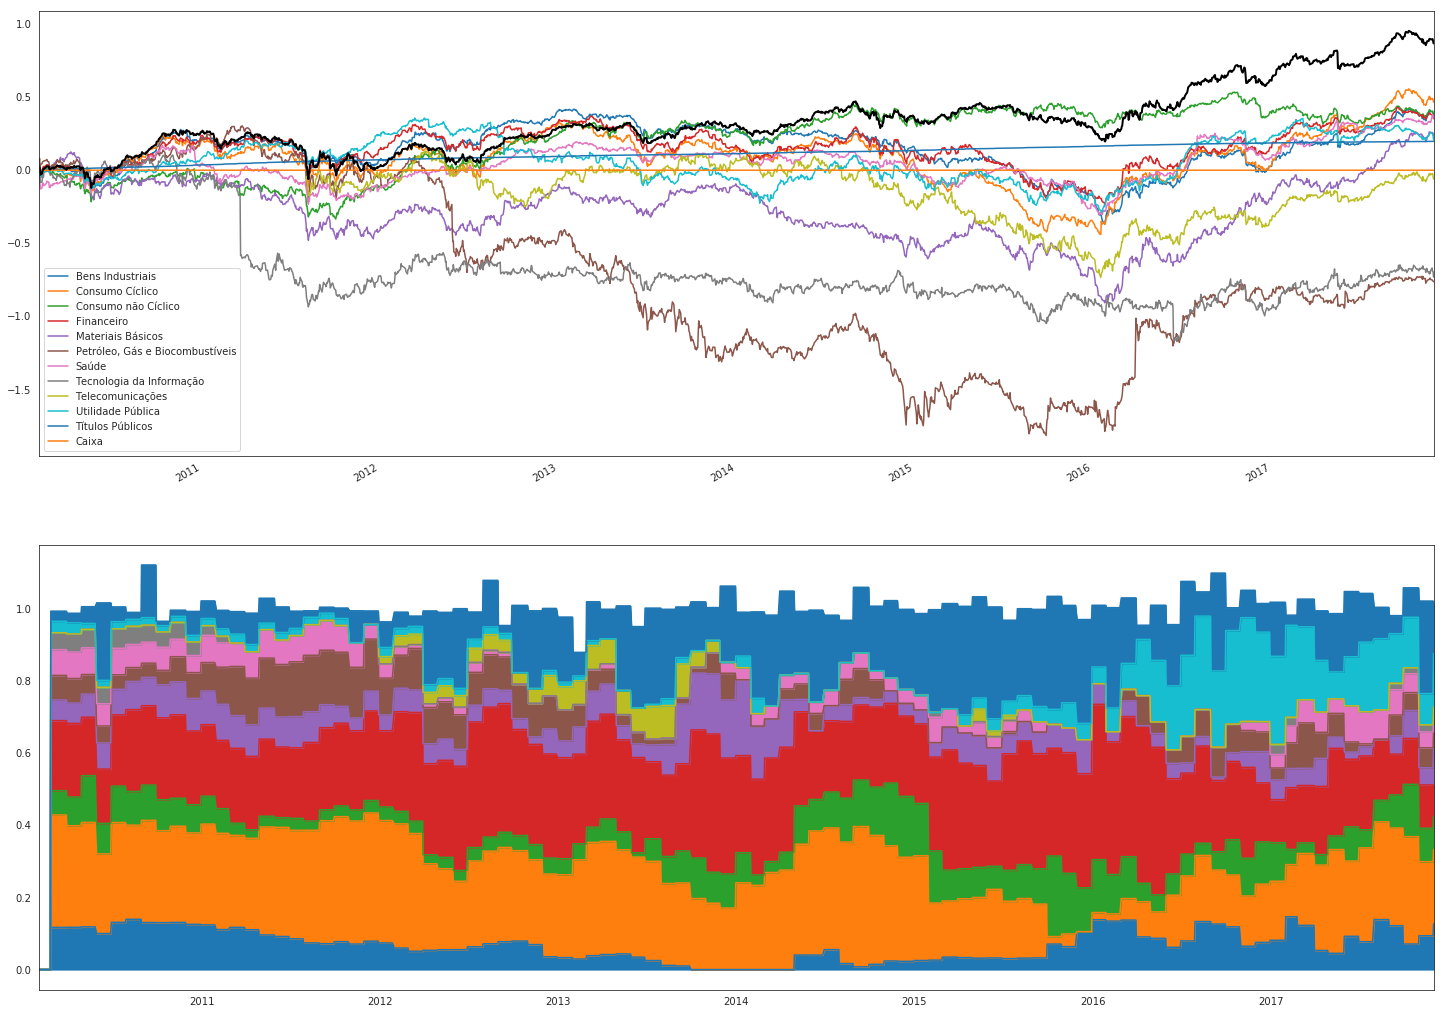

In [201]:
fig, (axu, axd) = plt.subplots(2,1, figsize=(25,20))
signals.cumsum().plot(ax=axu)
measurements.cumsum().plot(ax=axu, color='k', lw=2)
states.fillna(method='pad').plot.area(ax=axd, stacked=True, legend=True)

states.fillna(method='pad').mul(signals).sum(axis=1).cumsum().plot(ax=axu, color='k', ls='--', lw=2)
;

In [202]:
#correlação de não se fazer nada
states.fillna(method='pad').mul(signals).sum(axis=1).corr(measurements)

0.9237382187878626

In [236]:
n_dim = len(states.columns)

from filterpy.kalman import KalmanFilter
from filterpy.common import Saver, inv_diagonal
import tqdm

kf = KalmanFilter(n_dim,2+ n_dim)
kf.F *= 1
kf.Q *= np.sqrt(0.005)#0.31#2500


kf.x = eom_pesos.iloc[0].fillna(0).values
kf.P = np.zeros(kf.dim_x)


s = Saver(kf)
Hs = []
Rs = []
Zs = []
epss = []
for i,dt in tqdm.tqdm_notebook(enumerate(measurements.index), total=len(measurements)):
    
    if dt in eom_pesos.index:
        H = np.vstack([signals.loc[dt].fillna(0).values.reshape(1,kf.dim_x), np.eye(kf.dim_x), np.ones(kf.dim_x)])
        R = np.eye(kf.dim_z) * 0.3
    else:
        H = np.vstack([signals.loc[dt].fillna(0).values.reshape(1,kf.dim_x),  np.eye(kf.dim_x)*0, np.ones(kf.dim_x)]).astype(float)
        R = np.eye(kf.dim_z) * 0.3
        R[0,0] = 0.0008
        R[-1,-1] = 0.00000001
 

    Z = np.hstack([measurements.loc[dt], states.loc[dt].fillna(0), 1])
    
    kf.H = H
    kf.R = R
    kf.F = np.diag((1-H[0]).reshape(kf.dim_x))
    
    kf.predict()
    kf.update(Z)
    
    y, S = kf.y[[0]], kf.S[0,0].reshape(1,1)
    eps = np.dot(y.T, np.linalg.inv(S)).dot(y)
    
    epss.append(eps)
    
    s.save()

s.to_array()

estimativas = pd.DataFrame(s.x, index=measurements.index, columns=signals.columns)
(estimativas * signals).sum(axis=1).corr(measurements)

0.975658536093619

In [237]:
from filterpy.kalman import rts_smoother
## Calcula as matrizes smoothed
sx, sP, sK, spP = rts_smoother(s.x, s.P, s.F, s.Q)

smooth = pd.DataFrame(sx, index=measurements.index, columns=signals.columns)
(smooth * signals).sum(axis=1).corr(measurements)

0.9672391061814946

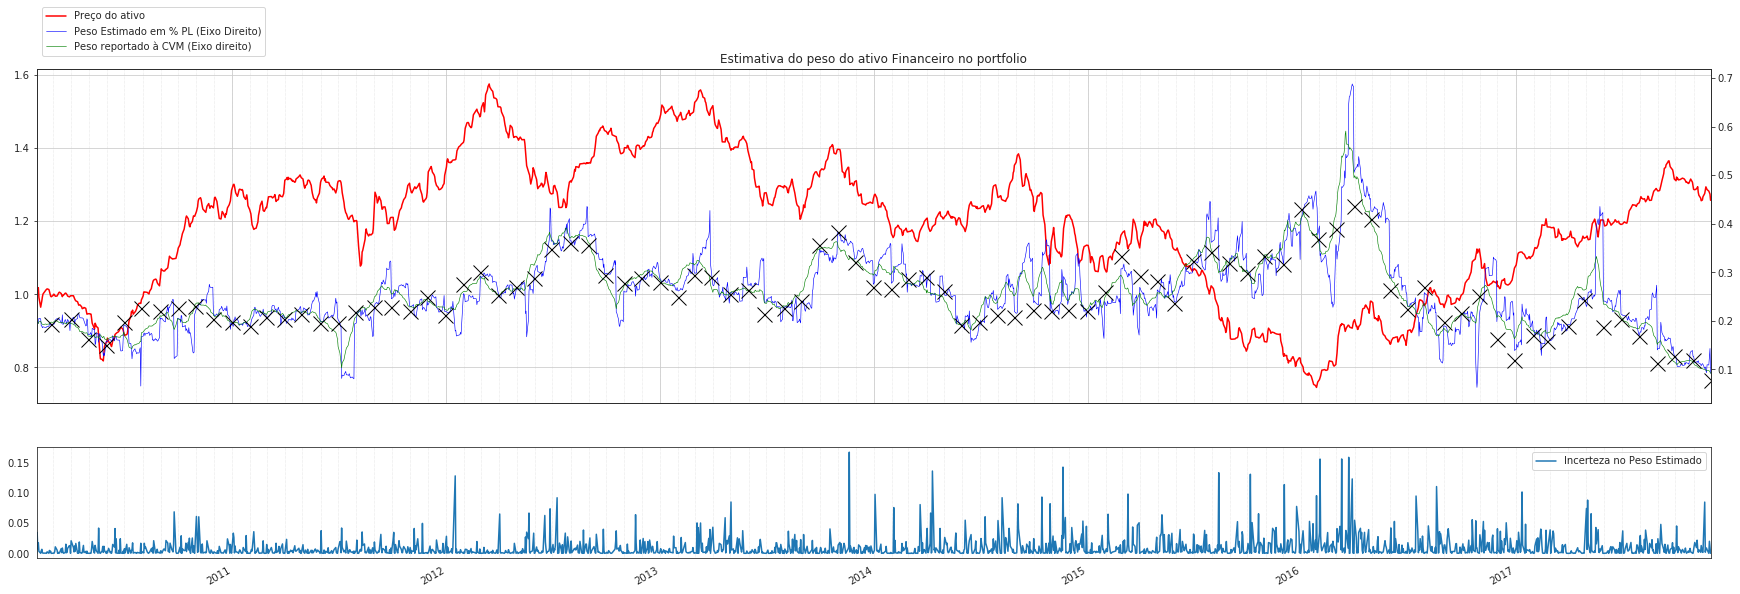

In [238]:
#verifica o ativo 
%matplotlib inline

ativo = 'Financeiro'


erro_estimativa_ativo = pd.Series(s.y[:,0], index=measurements.index).pow(2).div(s.S[:,0,0])


fig, ax = plt.subplots(2,1, figsize=(30,10), sharex=True, gridspec_kw=dict(height_ratios=[3,1], hspace=0.2), facecolor='white')
estimativas.loc[:,ativo].plot(secondary_y=True, color='Blue', legend='peso', ax=ax[0], lw=.6)
smooth.loc[:,ativo].plot(secondary_y=True, color='Green', legend='peso', ax=ax[0], lw=.6)
states[ativo].dropna().plot(marker='x', linestyle='', color='black', markersize='15', secondary_y=True, ax=ax[0])
signals.loc[:,ativo].rolling(3).median().add(1).cumprod().plot(color='red',ax=ax[0])



import matplotlib.dates as mdates

ax[0].xaxis.set_minor_locator(mdates.MonthLocator())
ax[0].xaxis.set_major_locator(mdates.YearLocator())
ax[0].grid(which='major', linestyle='-')
ax[0].grid(which='minor', linestyle=':', lw=.5)

ax[1].xaxis.set_minor_locator( mdates.MonthLocator())
ax[1].xaxis.set_major_locator(mdates.YearLocator())
ax[1].grid(which='major', linestyle='-')
ax[1].grid(which='minor', linestyle=':', lw=.5)


erro_estimativa_ativo.plot(ax=ax[1])

[t.set_visible(True) for t in ax[0].get_xticklabels()]
ax[0].set_title("Estimativa do peso do ativo {} no portfolio".format(ativo))
handlers = ax[0].get_legend_handles_labels()[0] + ax[0].right_ax.get_legend_handles_labels()[0]
ax[0].legend(handlers, ["Preço do ativo", "Peso Estimado em % PL (Eixo Direito)","Peso reportado à CVM (Eixo direito)"], loc=2, bbox_to_anchor=(0,1.2))
ax[1].legend(ax[1].get_legend_handles_labels()[0], ["Incerteza no Peso Estimado"])

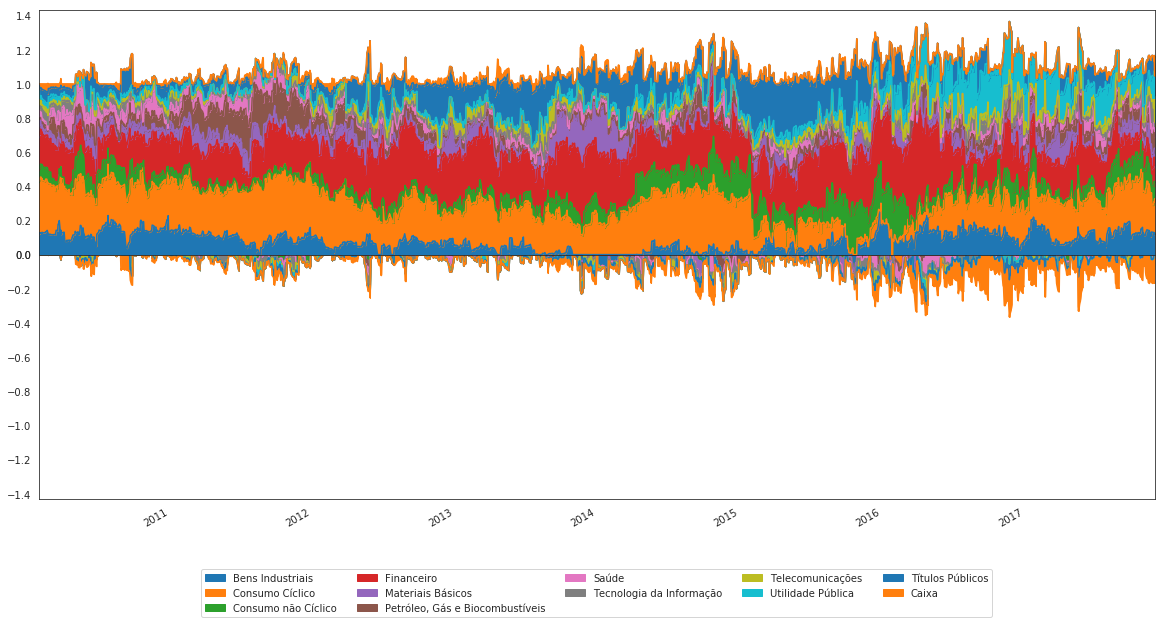

In [239]:
fig, (axu, axd) = plt.subplots(2, gridspec_kw=dict(hspace=0))
estimativas[(estimativas > 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axu, legend=None)
estimativas[(estimativas < 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axd)
axu.set_xticks([])
axd.set_ylim(-axu.get_ylim()[1],0)
axd.legend(ncol=5,loc=8, bbox_to_anchor=(0.5,-0.5))

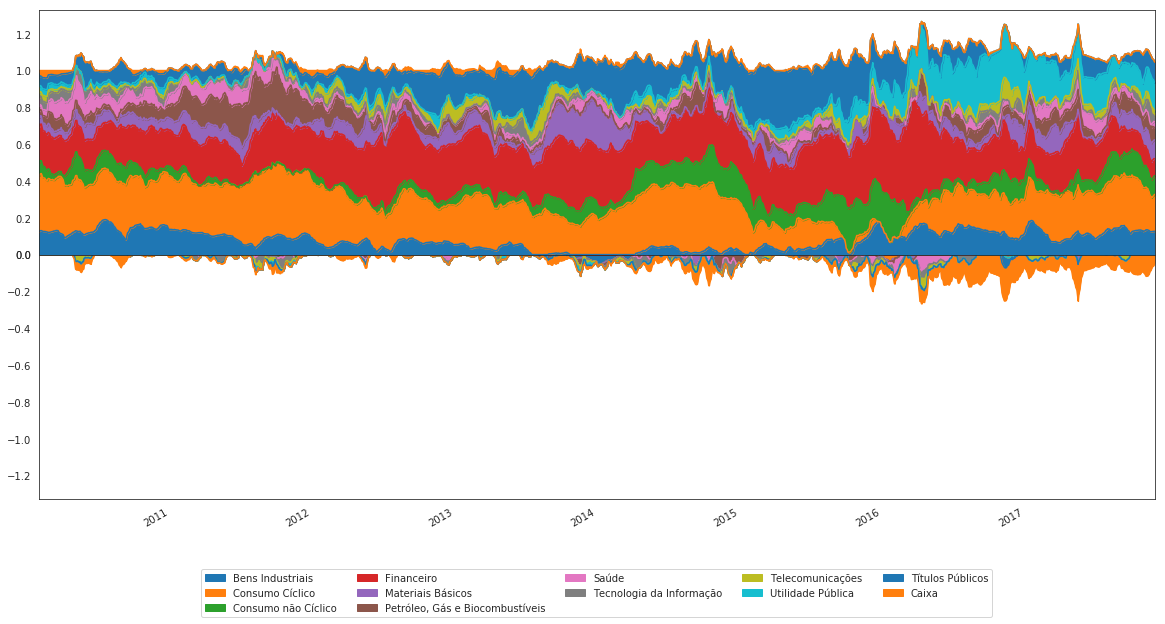

In [240]:
fig, (axu, axd) = plt.subplots(2, gridspec_kw=dict(hspace=0))
smooth[(smooth > 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axu, legend=None)
smooth[(smooth < 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axd)
axu.set_xticks([])
axd.set_ylim(-axu.get_ylim()[1],0)
axd.legend(ncol=5,loc=8, bbox_to_anchor=(0.5,-0.5))

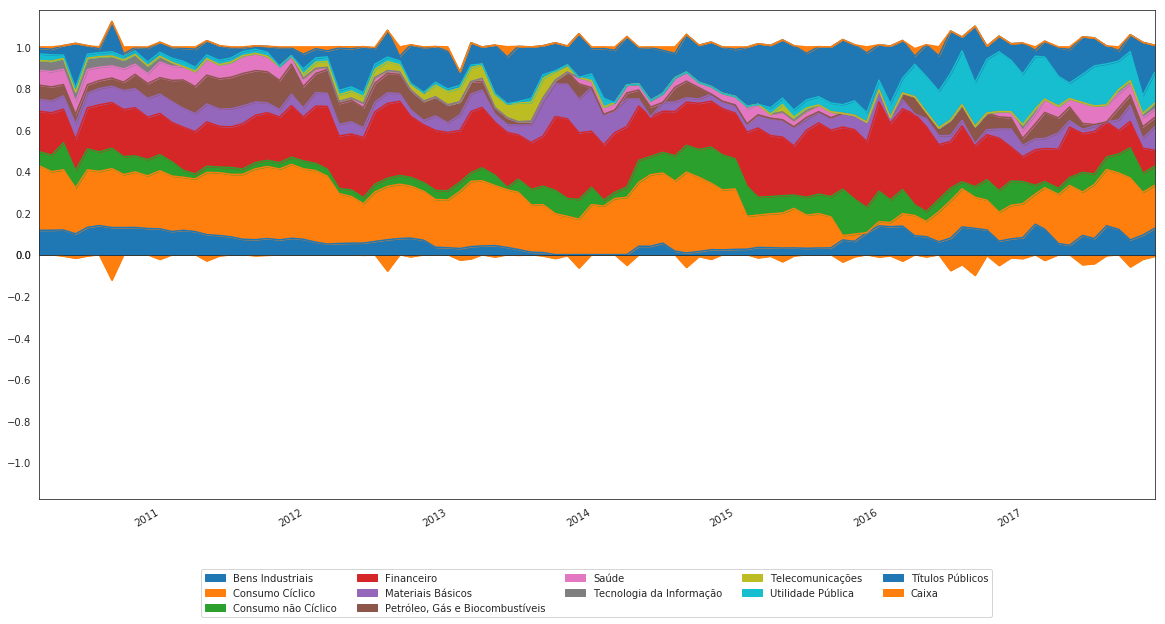

In [241]:
fig, (axu, axd) = plt.subplots(2, gridspec_kw=dict(hspace=0))
eom_pesos[(eom_pesos > 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axu, legend=None)
eom_pesos[(eom_pesos < 0)].reindex(columns=pesos_agregados.columns).plot.area(figsize=(20,10), ax=axd)
axu.set_xticks([])
axd.set_ylim(-axu.get_ylim()[1],0)
axd.legend(ncol=5,loc=8, bbox_to_anchor=(0.5,-0.5))


Correlacao 0.9872632765551066


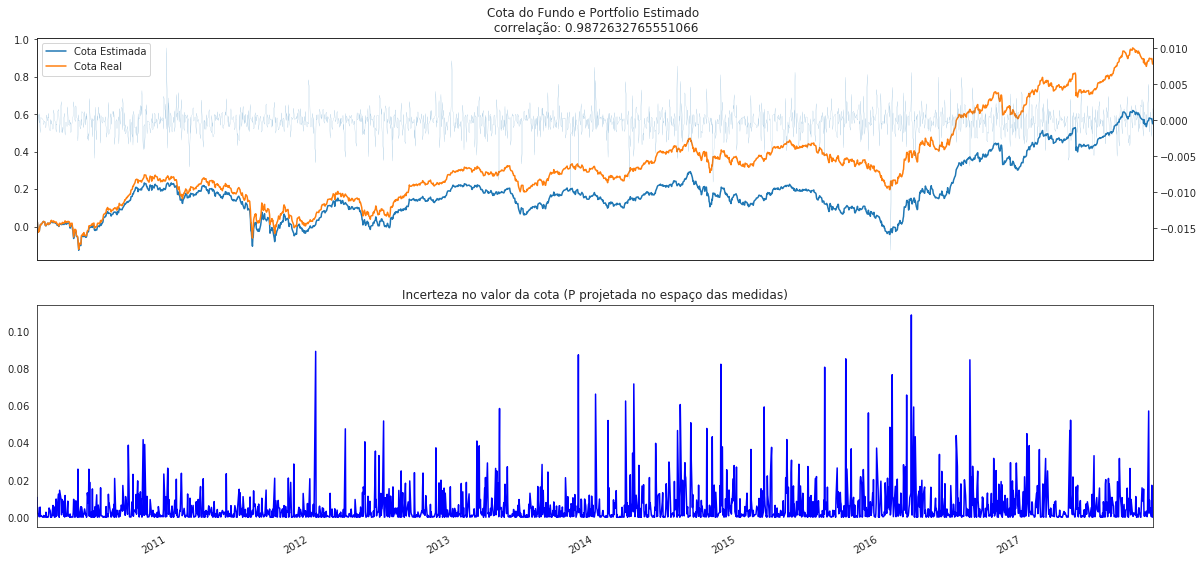

In [185]:
erros = pd.Series(s.y[:,0], index=measurements.index).pow(2).div(s.S[:,0,0])

fig, (axu, axd) = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True, facecolor='white')
estimativas.mul(signals).sum(1).cumsum().plot(ax=axu)
measurements.cumsum().plot(ax=axu)
axur = axu.twinx()
(estimativas.mul(signals).sum(1) - measurements.T).plot(ax=axur, lw='0.1')
erros.plot(color='Blue', secondary_y=False, ax=axd)
print("Correlacao", estimativas.mul(signals).sum(1).corr(measurements))
axu.set_title("Cota do Fundo e Portfolio Estimado \n correlação: {}".format(estimativas.mul(signals).sum(1).corr(measurements)))
axd.set_title("Incerteza no valor da cota (P projetada no espaço das medidas)")
axu.legend(['Cota Estimada','Cota Real'])

In [ ]:
estimativas.sum(axis=1).plot()

## Kalman por setor

In [247]:
cota_setor = estimativas * signals

In [253]:
measurement_setor = cota_setor['Financeiro']